Copyright (C) 2016 - 2019 Pinard Liu(liujianping-ok@163.com)

https://www.cnblogs.com/pinard

Permission given to modify the code as long as you keep this declaration at the top

用scikit-learn学习主成分分析(PCA) https://www.cnblogs.com/pinard/p/6243025.html

# scikit-learn使用PCA降维小结

本文在[主成分分析（PCA）原理总结](http://www.cnblogs.com/pinard/p/6239403.html)和[用scikit-learn学习主成分分析(PCA)](https://www.cnblogs.com/pinard/p/6243025.html)的内容基础上做了一些笔记和补充，强调了我认为重要的部分，其中一些细节不再赘述。

## pca的思想

pca（Principal components analysis，主成分分析）是一种降维算法，它通过使样本间方差尽量大来尽可能保留原始数据的相关关系。










## pca的算法

    1) 对所有的样本进行中心化

    2) 计算样本的协方差矩阵

    3) 对协方差矩阵进行特征值分解

    4）取出最大的m个特征值对应的特征向量, 将所有的特征向量标准化后，组成特征向量矩阵W。

    5）对样本集中的每一个样本转化为新的样本
    


## scikit-learn的sklearn.decomposition.PCA参数介绍

官方文档：[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Parameters:

n_components：这个代表了需要降维的维度。当它是整数时，代表了保留的维度数量。当它是一个介于0~1之间的数时，代表了主成分的方差所占的最小比例，例如0.95代表取超过95%的量的维度。当它为‘mle’，同时svd_solver == ‘full’时，系统会根据MLE算法自动选择维度。（此时svd_solver == ‘auto’将会被解读为svd_solver == ‘full’）

svd_solver：默认是‘auto’，即在剩下的‘full’, ‘arpack’, ‘randomized’中根据情况选一个。‘full’是传统的PCA，‘arpack’, ‘randomized’适用于数据量大的场景，其区别在于前者是通过scipy.sparse.linalg.svds实现。

Attributes*:

components_ : 主成分的投影坐标，代表了数据的最大方差的方向，根据explained_variance_由大到小排列。维度是m*n，其中n是原始数据的维度，m是降维后的维度。

explained_variance_和explained_variance_ratio_：前者是每一维的方差，后者是所占比例：

explained_variance_ratio_=explained_variance/sum（explained_variance_）

维度是m, 当m=n时，sum（explained_variance_ratio_）=1。

mean_：每个feature的平均值。在pca算法的第一步，需要对feature归一化，此时的平均值保留在这里。

n_components_ ：模型实际的降维数，即m。

## PCA实例

[用scikit-learn学习主成分分析(PCA)](https://www.cnblogs.com/pinard/p/6243025.html)中示范了降维的操作。

首先我们生成随机数据并可视化，代码如下：

c:\programdata\anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


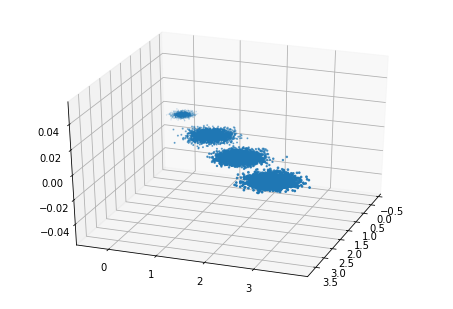

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

现在我们来进行降维，从3维降到2维，代码如下：

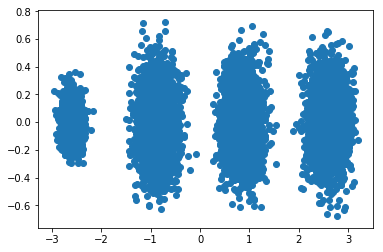

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

在很多应用中，当我们将数据降维并用于训练后，训练出来的模型之后的输出也是降维后的数据，需要还原回原始维度。这时候需要将pca算法进行逆运算：

X_old=np.dot(X_new,pca.components_)+pca.mean_

即将新数据和components_相乘并加上平均值。

使用上文的例子，代码如下：

c:\programdata\anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


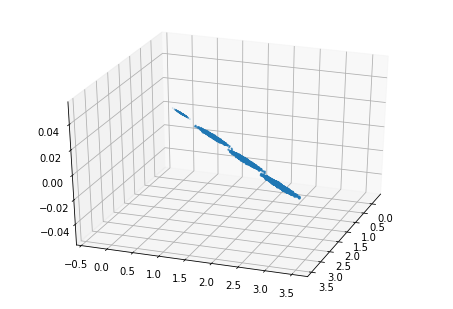

In [3]:
X_old=np.dot(X_new,pca.components_)+pca.mean_
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X_old[:, 0], X_old[:, 1], X_old[:, 2],marker='o')

可以看到，数据即是投影到最大方差方向但并未进行降维时的样子。

*parameter的命名后面没有下划线，而attribute的命名后面都有下划线，以此区分。